In [2]:
import pandas as pd
lien ="tableau_coeff.xlsx"
df = pd.read_excel(lien)

In [3]:
df

,Prix_de_vente,min,max,coeff,Unnamed: 4,Unnamed: 5
0,<20 000,0,20000,6500.000,NaN,NaN
1,20 000 - 30 000,20001,30000,7000.000,NaN,NaN
2,30 001 - 40 000,30001,40000,8500.000,NaN,NaN
3,40 001 - 50 000,40001,50000,0.145,NaN,NaN
4,50 001 - 60 000,50001,60000,0.130,NaN,NaN
5,60 001 - 70 000,60001,70000,0.115,NaN,NaN
6,70 001 - 90 000,70001,90000,0.110,NaN,NaN
7,90 001 - 120 000,90001,120000,0.095,NaN,NaN
8,120 001 - 150 000,120001,150000,0.090,NaN,NaN
9,150 001 - 180 000,150001,180000,0.085,NaN,NaN


In [4]:
def prix_nv(prix_net_vendeur):
    for i in range(0, len(df)):
        #print(prix_net_vendeur)
        #print(df['Prix_de_vente'][i])
        if prix_net_vendeur >= df['min'][i] and prix_net_vendeur <= df['max'][i]:
            coeff_temp = df['coeff'][i]
            prix_vente_temp = prix_net_vendeur + (prix_net_vendeur * df['coeff'][i])
            #print(f'Coeff temporaire : ' ,coeff_temp)
            #print(f'prix_vente temporaire : ',prix_vente_temp)
            if prix_net_vendeur + (prix_net_vendeur * df['coeff'][i]) > df['min'][i+1] : 
                prix_vente = prix_net_vendeur + (prix_net_vendeur * df['coeff'][i+1])
                coeff = df['coeff'][i+1]
                return coeff, prix_vente
                #print(prix_vente, df['coeff'][i+1])
                #print(prix_net_vendeur)
                #print(f'Coeff : ' ,df['coeff'][i+1])
                #print(f'prix_vente : ',prix_vente)
            else :
                return coeff_temp, prix_vente_temp
                #print(prix_net_vendeur)
                #print(f'Coeff temporaire : ' ,coeff_temp)
                #print(f'prix_vente temporaire : ',prix_vente_temp)

In [94]:
prix_net_vendeur = 5000
if prix_net_vendeur : 
    prix_net_vendeur = float(prix_net_vendeur)
    print(prix_net_vendeur)
    for i in range(0,3):
        if prix_net_vendeur > df['min'][i] and prix_net_vendeur <= df['max'][i] : 
            fixe = df['coeff'][i]
            print(fixe)
            prix_vente_temp =  prix_vente_temp + fixe

    for i in range(3, len(df)):
        if prix_net_vendeur > df['min'][i] and prix_net_vendeur <= df['max'][i]:
            coeff_temp = df['coeff'][i]
            prix_vente_temp = prix_net_vendeur / (1 - df['coeff'][i])
            if prix_net_vendeur + (prix_net_vendeur * df['coeff'][i]) > df['min'][i+1]:
                prix_vente = prix_net_vendeur / ( 1 - df['coeff'][i+1])
                coeff = df['coeff'][i+1]
            
    print("nope")


5000.0
6500.0


NameError: name 'prix_vente_temp' is not defined

In [5]:
prix_net_vendeur = int(input("Inserez le prix net_vendeur"))

print(prix_nv(prix_net_vendeur)[0], prix_nv(prix_net_vendeur)[1])

0.085 173600.0


In [26]:
df_analyse

,Prix net vendeur,Coeff selectionne,Prix de vente,Frais,prix_coeff_lim
0,55000,0.115,61325.0,6325.0,True
1,56000,0.115,62440.0,6440.0,False
2,57000,0.115,63555.0,6555.0,False
3,58000,0.115,64670.0,6670.0,False
4,59000,0.115,65785.0,6785.0,False
...,...,...,...,...,...
125,180000,0.080,194400.0,14400.0,False
126,181000,0.080,195480.0,14480.0,False
127,182000,0.080,196560.0,14560.0,False
128,183000,0.080,197640.0,14640.0,False


limites net vendeur :  [55000, 63000, 82000, 110000, 138000, 166000, 213000, 280000, 374000, 470000, 944000]
limites prix vente :  [61325.0, 69930.0, 89790.0, 119900.0, 149730.0, 179280.0, 228975.0, 299600.0, 398310.0, 498200.0, 995920.0]
[-6325.0, -6930.0, -7790.0, -9900.0, -11730.0, -13280.0, -15975.0, -19600.0, -24310.0, -28200.0, -51920.0]


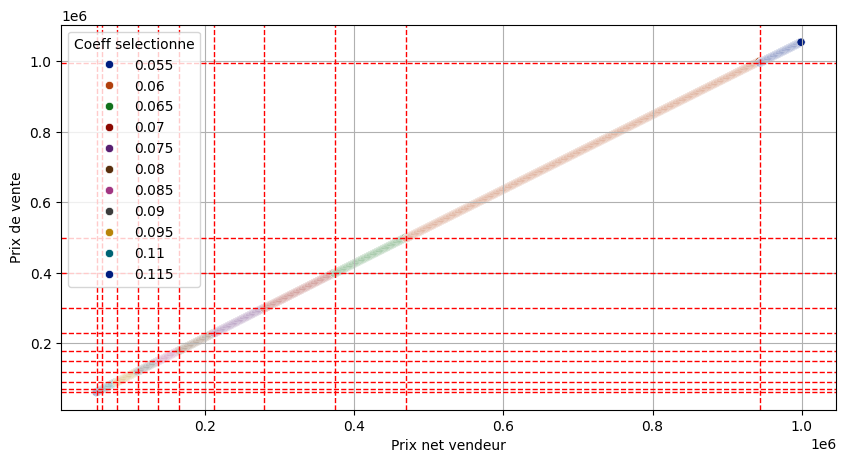

In [79]:
import seaborn as sns 
import matplotlib.pyplot as plt


Prix_net_vendeur = []
Coeff_selectionne = []
Prix_de_vente = []
coeff_lim_lst_n = []
coeff_lim_lst_v = []

for i in range(55_000,1_000_000, 1000):
    Prix_net_vendeur.append(i)
    Coeff_selectionne.append(prix_nv(i)[0])
    Prix_de_vente.append(prix_nv(i)[1])


df_analyse= pd.DataFrame({
    "Prix net vendeur" : Prix_net_vendeur,
    "Coeff selectionne" : Coeff_selectionne,
    "Prix de vente" : Prix_de_vente,
})

df_analyse['Frais'] = df_analyse['Prix net vendeur'] * df_analyse['Coeff selectionne']
df_analyse['prix_coeff_lim'] = df_analyse['Coeff selectionne'].ne(df_analyse['Coeff selectionne'].shift(1))

for idx, row in df_analyse.iterrows() :
    if row['prix_coeff_lim'] :
        #print(row['Prix net vendeur'])
        coeff_lim_lst_n.append(row['Prix net vendeur'])
        coeff_lim_lst_v.append(row['Prix de vente'])
    #else : print("Nope")


plt.figure(figsize=(10,5))
for seuil_n in coeff_lim_lst_n:
    plt.axvline(x=seuil_n, color='red', linestyle='--', linewidth=1)
for seuil_v in coeff_lim_lst_v:
    plt.axhline(y=seuil_v, color='red', linestyle='--', linewidth=1)
sns.scatterplot(df_analyse, x= 'Prix net vendeur' , y = 'Prix de vente', hue= 'Coeff selectionne', palette='dark' )
plt.grid(True)

print(f"limites net vendeur : ",coeff_lim_lst_n)
print("limites prix vente : ", coeff_lim_lst_v)

diff_lst = [a - b for a, b in zip(coeff_lim_lst_n, coeff_lim_lst_v)]

print(diff_lst)

In [80]:
df

,Prix_de_vente,min,max,coeff,Unnamed: 4,Unnamed: 5
0,<20 000,0,20000,6500.000,NaN,NaN
1,20 000 - 30 000,20001,30000,7000.000,NaN,NaN
2,30 001 - 40 000,30001,40000,8500.000,NaN,NaN
3,40 001 - 50 000,40001,50000,0.145,NaN,NaN
4,50 001 - 60 000,50001,60000,0.130,NaN,NaN
5,60 001 - 70 000,60001,70000,0.115,NaN,NaN
6,70 001 - 90 000,70001,90000,0.110,NaN,NaN
7,90 001 - 120 000,90001,120000,0.095,NaN,NaN
8,120 001 - 150 000,120001,150000,0.090,NaN,NaN
9,150 001 - 180 000,150001,180000,0.085,NaN,NaN


<Axes: xlabel='Prix net vendeur', ylabel='Prix de vente'>

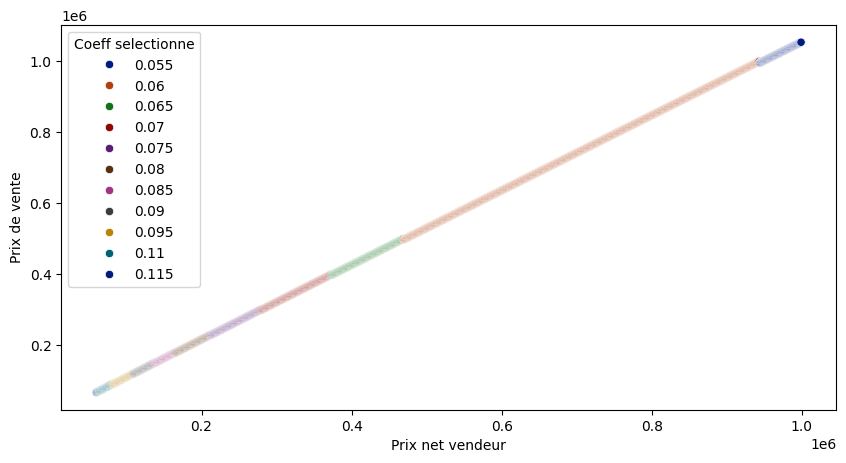

In [78]:

Prix_net_vendeur = []
Coeff_selectionne = []
Prix_de_vente = []

for i in range(60_000,1_000_000, 1000):
    Prix_net_vendeur.append(i)
    Coeff_selectionne.append(prix_nv(i)[0])
    Prix_de_vente.append(prix_nv(i)[1])


df_analyse= pd.DataFrame({
    "Prix net vendeur" : Prix_net_vendeur,
    "Coeff selectionne" : Coeff_selectionne,
    "Prix de vente" : Prix_de_vente
})



plt.figure(figsize=(10,5))
sns.scatterplot(df_analyse, x= 'Prix net vendeur' , y = 'Prix de vente', hue= 'Coeff selectionne', palette='dark' )



In [33]:
print(prix_nv(165899)[0])
print(prix_nv(165899)[1])

0.085
180000.415


In [35]:
print(prix_nv(165900)[0])
print(prix_nv(165900)[1])

0.08
179172.0


In [36]:
print((prix_nv(165899)[1]) - (prix_nv(165900)[1]))

828.4150000000081


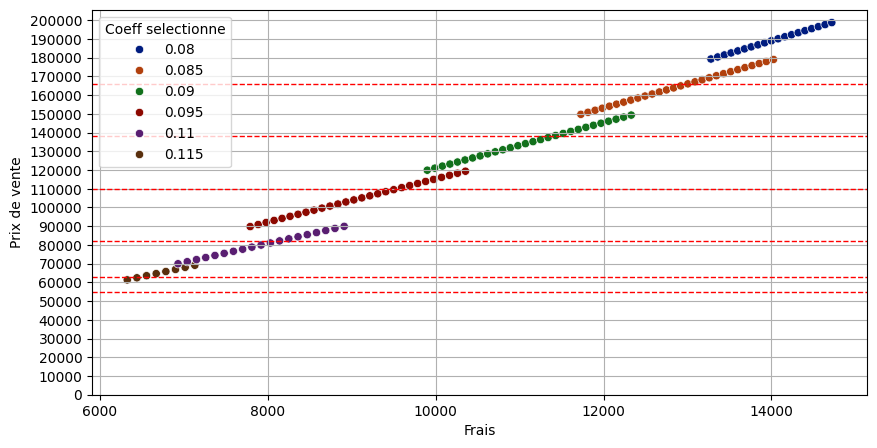

In [66]:
import numpy as np



plt.figure(figsize=(10,5))
sns.scatterplot(df_analyse, x= 'Frais' , y = 'Prix de vente', hue= 'Coeff selectionne', palette='dark' )
for seuil_n in coeff_lim_lst_n:
    plt.axhline(y=seuil_n, color='red', linestyle='--', linewidth=1)
plt.yticks(np.arange(0, df_analyse['Prix de vente'].max() + 10000, 10000))
plt.grid(True)

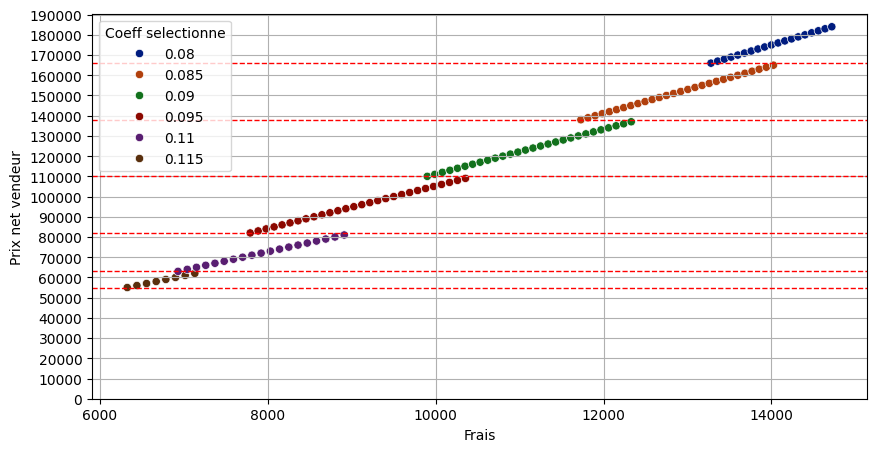

In [68]:
plt.figure(figsize=(10,5))
sns.scatterplot(df_analyse, x= 'Frais' , y = 'Prix net vendeur', hue= 'Coeff selectionne', palette='dark' )
for seuil_n in coeff_lim_lst_n:
    plt.axhline(y=seuil_n, color='red', linestyle='--', linewidth=1)
plt.yticks(np.arange(0, df_analyse['Prix net vendeur'].max() + 10000, 10000))
plt.grid(True)